<a href="https://colab.research.google.com/github/gsaini/python-foundations/blob/main/food-hub-case-study/foodhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To read the related data
df = pd.read_csv('/content/drive/MyDrive/Learner Notebooks/data/foodhub_order.csv')

In [ ]:
# To view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Check the datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated?

In [ ]:
# count the number of orders which are not rated.
df['rating'].isnull().sum()

print("Number of orders not rated:", df['rating'].isnull().sum())

Number of orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

Number of unique orders: 1898
Number of unique customers: 1200
Number of unique restaurants: 178
Number of unique cuisines: 14


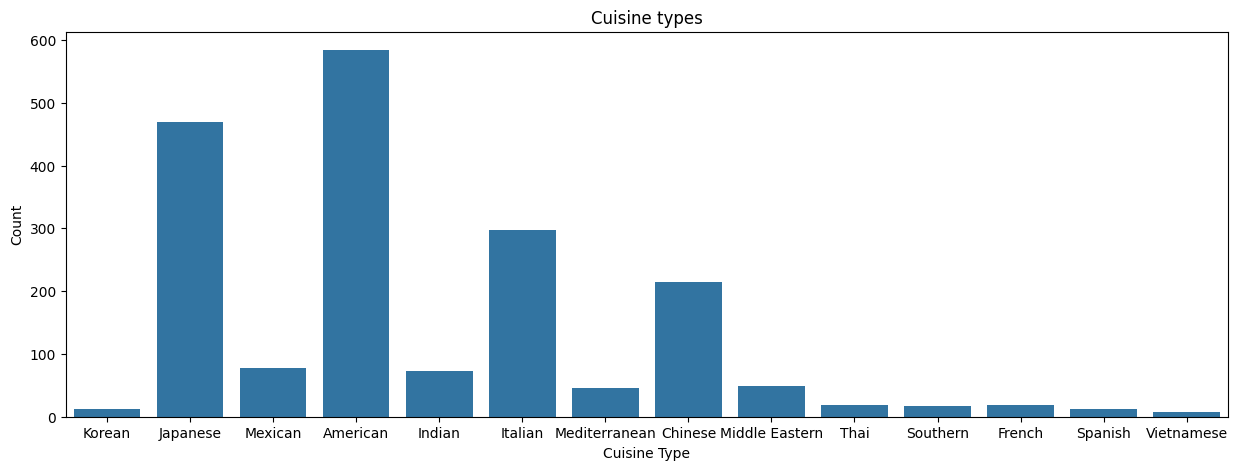

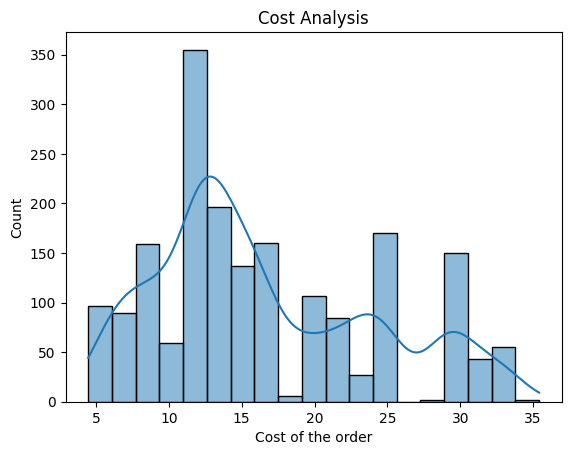

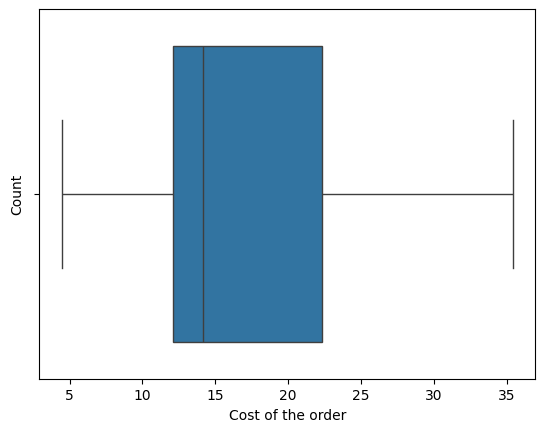

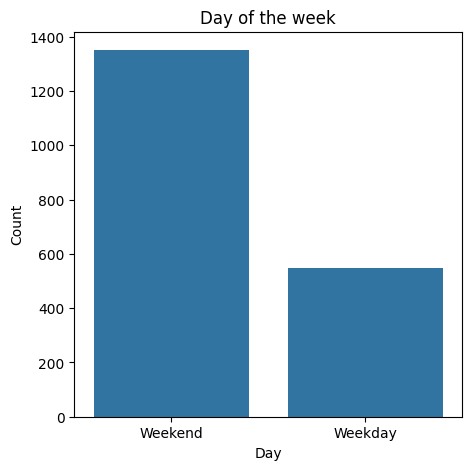

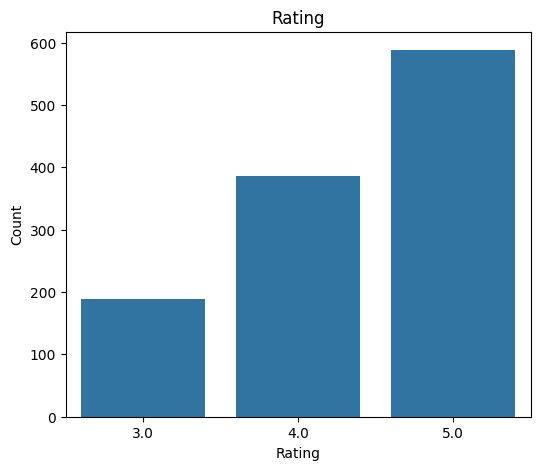

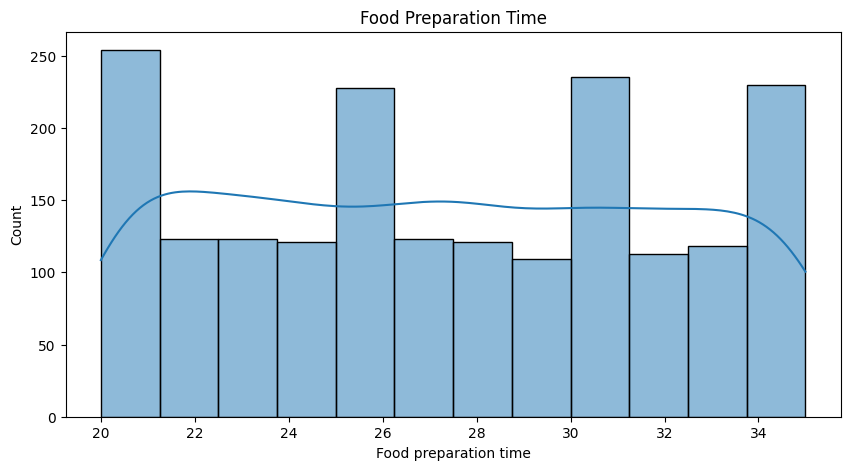

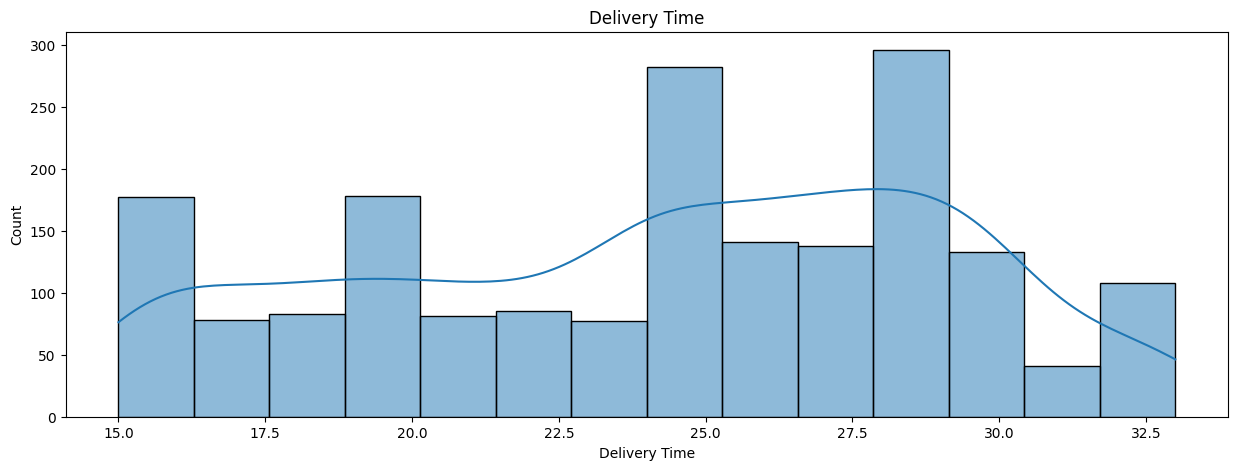

In [ ]:
# Number of unique orders
print("Number of unique orders:", df['order_id'].nunique())

# Check unique customers
print("Number of unique customers:", df['customer_id'].nunique())

# Check unique restaurants
print("Number of unique restaurants:", df['restaurant_name'].nunique())

# Check unique cuisines
print("Number of unique cuisines:", df['cuisine_type'].nunique())
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.title(f'Cuisine types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()


# Analysis of order's cost.
sns.histplot(data=df,x='cost_of_the_order', kde=True) ## Histogram for the cost of order
plt.title(f'Cost Analysis')
plt.xlabel('Cost of the order')
plt.ylabel('Count')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.xlabel('Cost of the order')
plt.ylabel('Count')
plt.show()


# Day of the week
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'day_of_the_week') ## Create a countplot for day of the week.
plt.title(f'Day of the week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# Ratings
plt.figure(figsize = (6,5))
sns.countplot(data = df, x = 'rating') ## Create a countplot for day of the week.
plt.title(f'Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Food Preparation Time
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'food_preparation_time', kde=True) ## Create a countplot for day of the week.
plt.title(f'Food Preparation Time')
plt.xlabel('Food preparation time')
plt.ylabel('Count')
plt.show()

# Delivery Time
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'delivery_time', kde=True) ## Create a countplot for day of the week.
plt.title(f'Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the

---

number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders
print("Top 5 restaurants in terms of the number of orders received:")

df['restaurant_name'].value_counts().head()

Top 5 restaurants in terms of the number of orders received:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]
if not weekend_data.empty:
  most_popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()
  print("The most popular cuisine on weekends is:", most_popular_cuisine)
else:
  print("No data available for weekends.")

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars
high_cost_orders = df[df['cost_of_the_order'] > 20]
total_orders = len(df)
high_cost_orders_count = len(high_cost_orders)
percentage = (high_cost_orders_count / total_orders) * 100
print(f"The percentage of orders costing more than $20 is: {percentage:.2f}%")

The percentage of orders costing more than $20 is: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Get the counts of  each customer_id
top_3_customers = df['customer_id'].value_counts().head(3)
print("The IDs of the top 3 most frequent customers are:")
print(top_3_customers)

The IDs of the top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

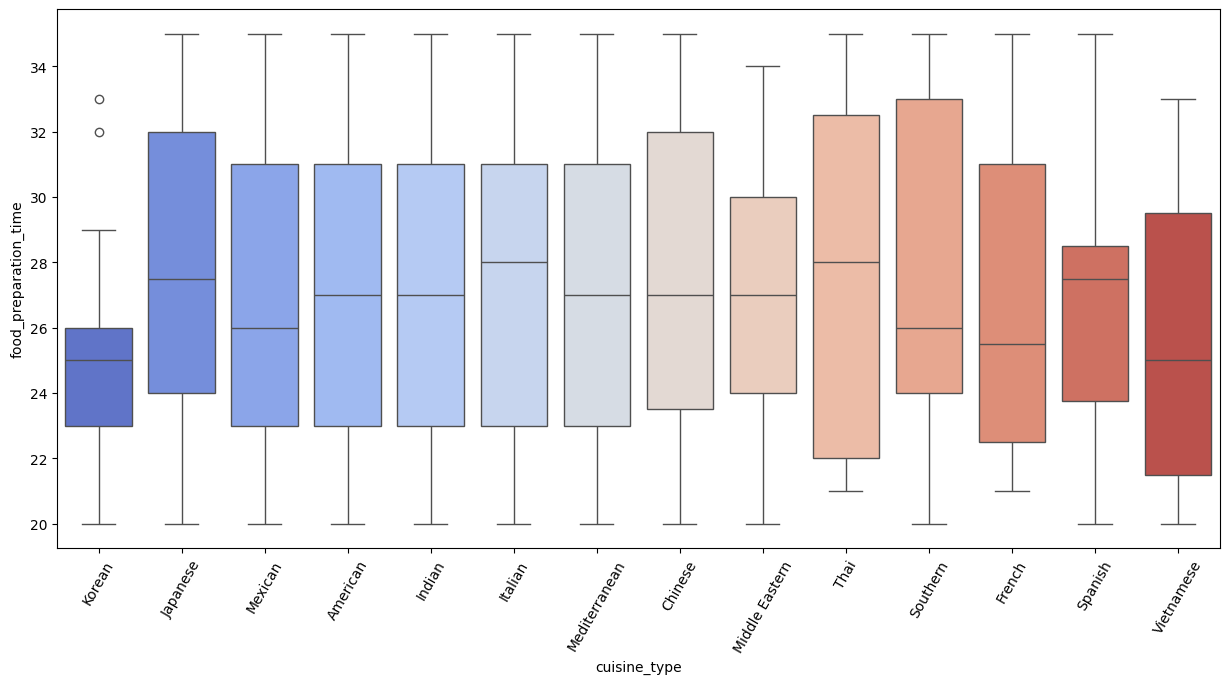

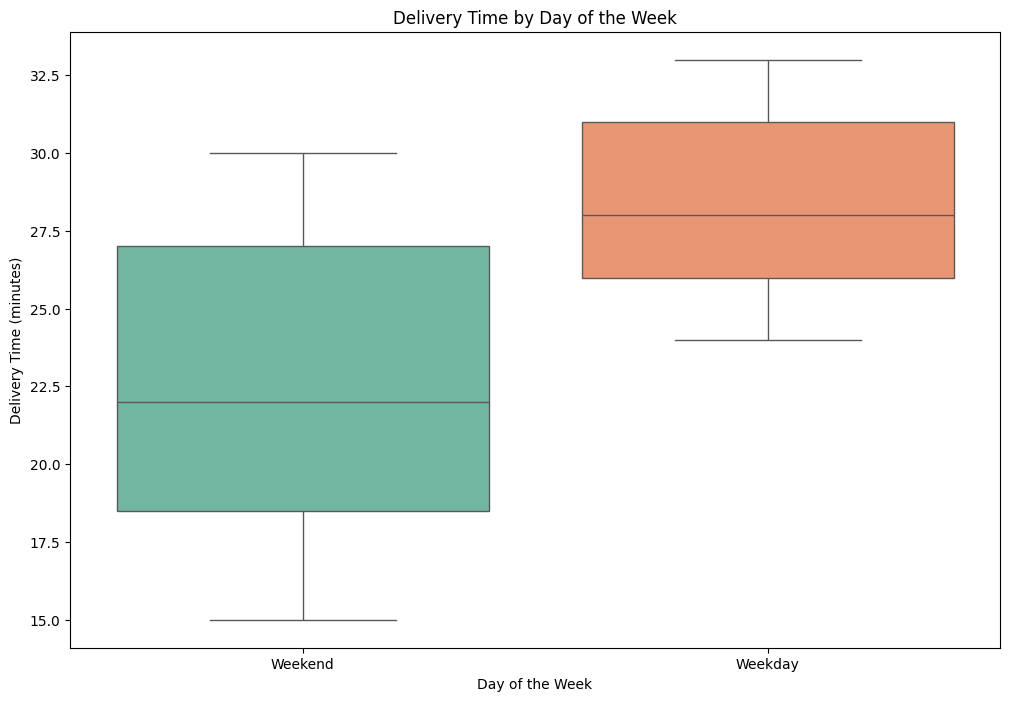

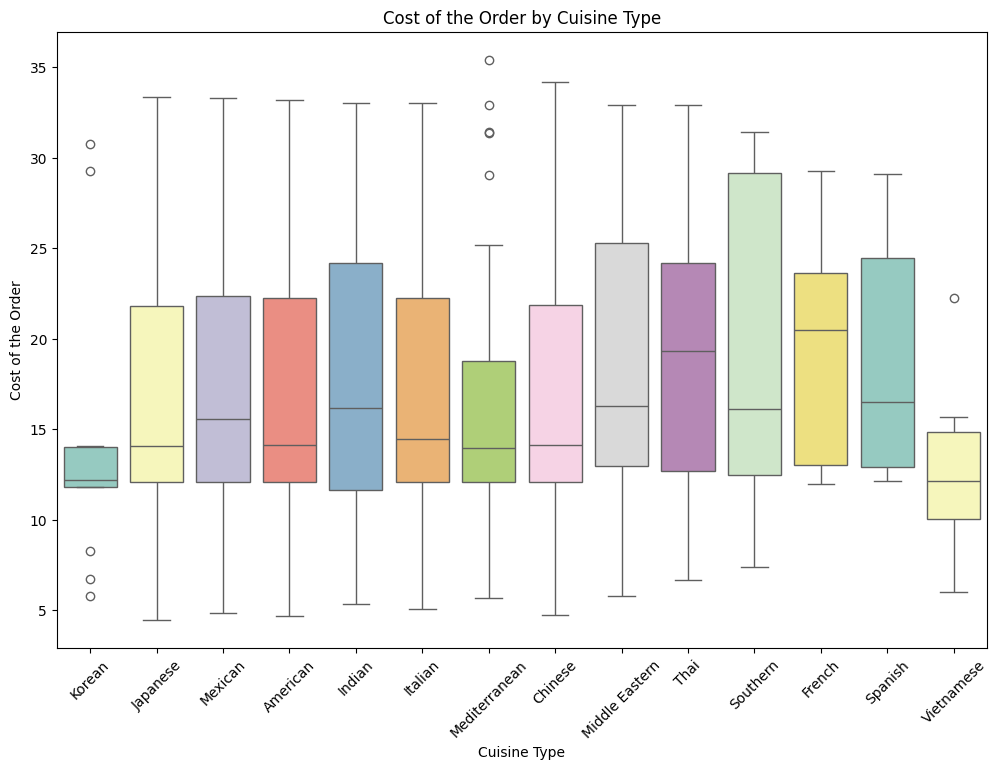

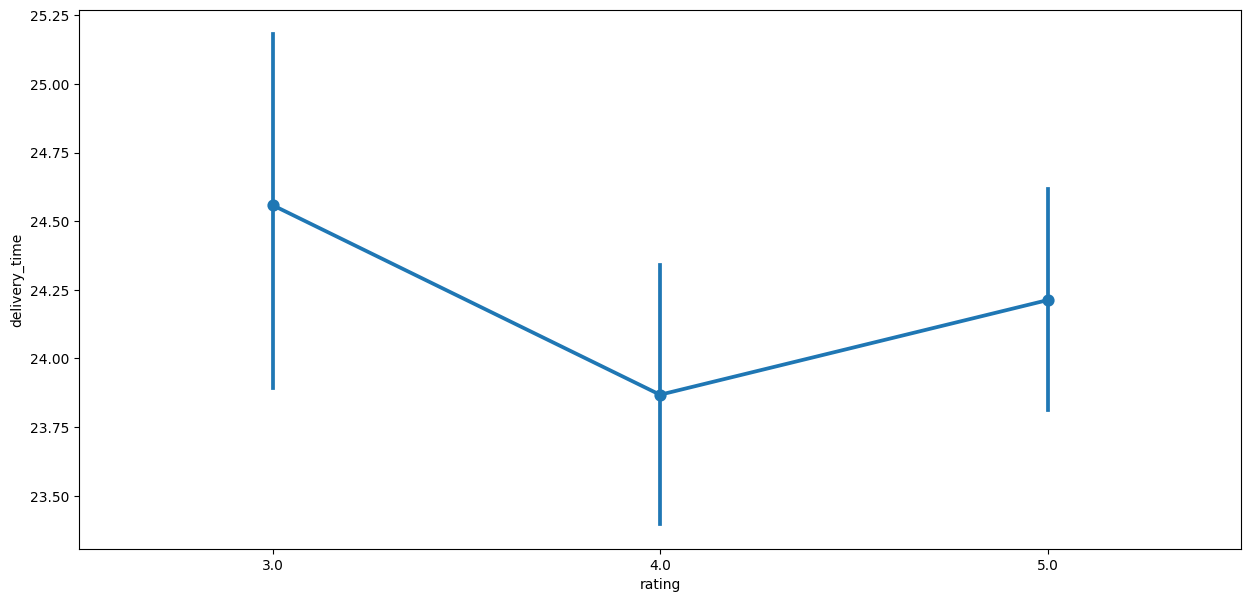

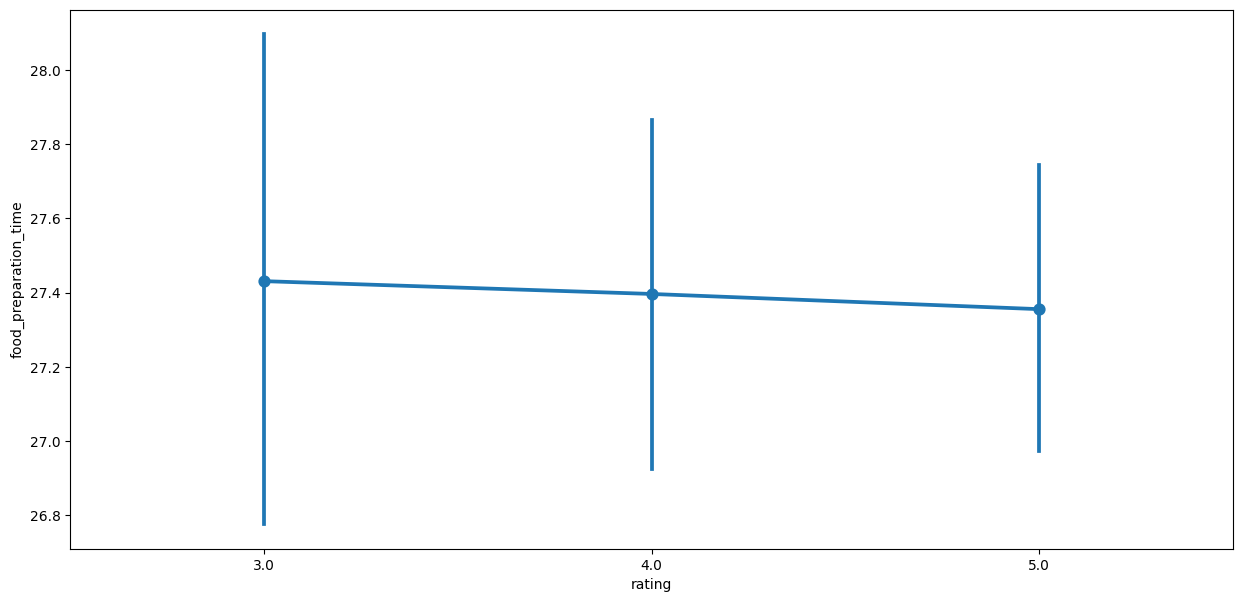

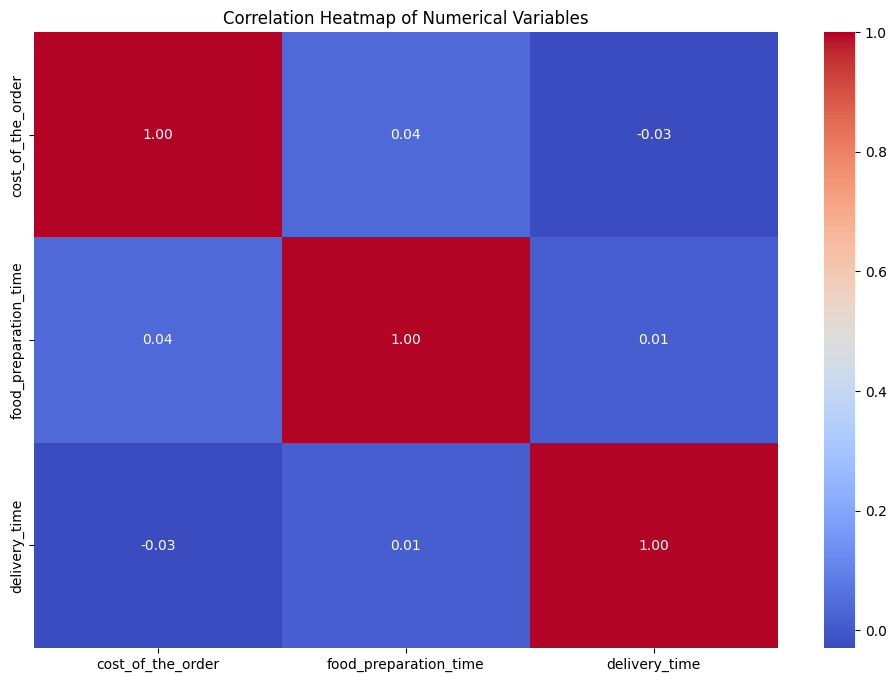

In [ ]:
# Cuisine vs Food Preparation time
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'coolwarm', hue="cuisine_type", legend=False)
plt.xticks(rotation = 60)
plt.show()

# Boxplot of delivery time by day of the week
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, hue='day_of_the_week', palette='Set2', dodge=False, legend=False)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Boxplot of cost of the order by cuisine type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, hue='cuisine_type', palette='Set3', dodge=False, legend=False)
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

# Select only numeric columns for correlation
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
correlation_matrix = df[col_list].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Group by restaurant_id and calculate rating count and average rating
# Ensure the 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_id and calculate rating count and average rating
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter restaurants based on the criteria
eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)
]

print("Restaurants Eligible for Promotional Offer:")
print(eligible_restaurants)

Restaurants Eligible for Promotional Offer:
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Apply commission rates based on order cost

df['commission'] = df['cost_of_the_order'].apply(
    lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0)
)

# Calculate total net revenue
total_net_revenue = df['commission'].sum()

print(f"The net revenue generated by the company across all orders is: ${total_net_revenue:.2f}")

The net revenue generated by the company across all orders is: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Calculate total delivery time (preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders taking more than 60 minutes
long_delivery_count = (df['total_delivery_time'] > 60).sum()
total_orders = len(df)
percentage_long_delivery = (long_delivery_count / total_orders) * 100

print("Percentage of Orders Taking More Than 60 Minutes to Deliver:", f"{percentage_long_delivery:.2f}%")

Percentage of Orders Taking More Than 60 Minutes to Deliver: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean Delivery Time (Weekdays vs Weekends) in Minutes:", mean_delivery_time)

Mean Delivery Time (Weekdays vs Weekends) in Minutes: day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:

### 🚚 **Delivery Time**
- There is a noticeable difference in mean delivery time between **weekdays and weekends**, with **weekends showing longer delivery times**.
- A significant portion of orders exceed **60 minutes** for delivery, indicating potential inefficiencies that need to be addressed.

### 🍽️ **Cuisine Popularity**
- Certain **cuisines see increased popularity on weekends**, suggesting a shift in customer preferences during leisure days that can be strategically targeted.

### 🏪 **Restaurant Performance**
- Only a limited number of restaurants qualify for **promotional offers**, highlighting **variability in customer satisfaction**, service quality, and order volume.

### 💰 **Revenue Generation**
- A large share of revenue comes from **orders above $20**, indicating a strong opportunity to focus on **higher-value transactions** and upselling.


### Recommendations:
### 🔧 Optimize Delivery Operations
- Reduce weekend delivery delays by **increasing delivery staff** or **optimizing delivery routes**.
- Introduce **time-based incentives** for delivery personnel to ensure timely deliveries during peak hours.

### 📢 Promote Popular Cuisines
- Leverage insights on **weekend cuisine trends** in marketing campaigns to increase customer engagement.
- Collaborate with top-performing restaurants to launch **weekend-exclusive deals** featuring these cuisines.

### ⭐ Improve Restaurant Ratings
- Share feedback with restaurants to help them **improve service quality and food presentation**.
- Launch **training programs** focused on food prep, packaging, and timely order fulfillment.

### 🎁 Expand Promotional Offers
- Use performance metrics to encourage more restaurants to **qualify for promotions**.
- Introduce **tiered promotional programs** to include restaurants that are near the qualifying threshold, boosting inclusivity and motivation.

### 😊 Enhance Customer Experience
- Actively monitor and respond to **customer feedback** to resolve pain points swiftly.
- Implement **loyalty programs** and personalized offers to **retain frequent customers** and improve satisfaction.

---